# Gold and Silver Comparison 

In [62]:
import quandl
import pandas as pd

api_key = open('quandlapikey.txt','r').read()


df_gold = quandl.get("WGC/GOLD_DAILY_USD", authtoken=api_key,start_date="2000-1-1")
df_gold.rename(columns={'Value':'Gold'}, inplace=True)
print(df_gold.head())

              Gold
Date              
2000-01-03  290.25
2000-01-04  281.50
2000-01-05  280.45
2000-01-06  279.40
2000-01-07  282.10


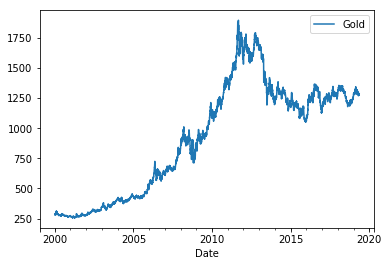

In [63]:
import matplotlib.pyplot as plt
from matplotlib import style


df_gold.plot()
plt.legend()
plt.show()

In [64]:
print(df_gold.describe())

              Gold
count  5050.000000
mean    917.524832
std     462.023353
min     255.950000
25%     420.450000
50%     992.375000
75%    1283.300000
max    1895.000000


In [65]:
df_gold_perc = quandl.get("WGC/GOLD_DAILY_USD", authtoken=api_key,start_date="2000-1-1")
df_gold_perc.rename(columns={'Value':'Gold'}, inplace=True)
df_gold_perc = df_gold_perc[['Gold']].pct_change()
print(df_gold_perc.head())

                Gold
Date                
2000-01-03       NaN
2000-01-04 -0.030146
2000-01-05 -0.003730
2000-01-06 -0.003744
2000-01-07  0.009664


In [66]:
df_gold_perc = df_gold_perc['Gold'].resample('A').mean() # how = 'mean'
print(df_gold_perc.head())

Date
2000-12-31   -0.000176
2001-12-31    0.000071
2002-12-31    0.000905
2003-12-31    0.000743
2004-12-31    0.000212
Freq: A-DEC, Name: Gold, dtype: float64


In [67]:
df_silver = quandl.get("PERTH/SLVR_USD_D", authtoken=api_key,start_date="2000-1-2")
df_silver.rename(columns={'Ask Average':'Silver'}, inplace=True)
df_silver = df_silver[['Silver']]
print(df_silver.head())

            Silver
Date              
2000-01-02    5.46
2000-01-03    5.45
2000-01-04    5.39
2000-01-05    5.35
2000-01-06    5.18


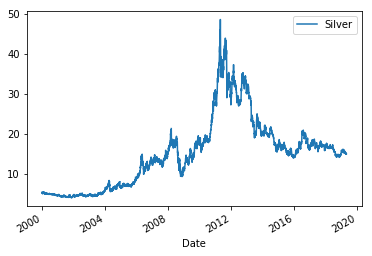

In [68]:
df_silver.plot()
plt.legend()
plt.show()

In [69]:
print(df_silver.describe())

            Silver
count  5339.000000
mean     14.516187
std       8.676275
min       4.120000
25%       6.530000
50%      14.490000
75%      18.060000
max      48.630000


In [70]:
df_silver_perc = quandl.get("PERTH/SLVR_USD_D", authtoken=api_key,start_date="2000-1-2")
df_silver_perc.rename(columns={'Ask Average':'Silver'}, inplace=True)
df_silver_perc = df_silver_perc[['Silver']].pct_change() #
print(df_silver_perc.head())

              Silver
Date                
2000-01-02       NaN
2000-01-03 -0.001832
2000-01-04 -0.011009
2000-01-05 -0.007421
2000-01-06 -0.031776


In [71]:
df_silver_perc = df_silver_perc['Silver'].resample('A').mean() # how = 'mean'
print(df_silver_perc.head())

Date
2000-12-31   -0.000421
2001-12-31    0.000029
2002-12-31    0.000130
2003-12-31    0.000710
2004-12-31    0.000529
Freq: A-DEC, Name: Silver, dtype: float64


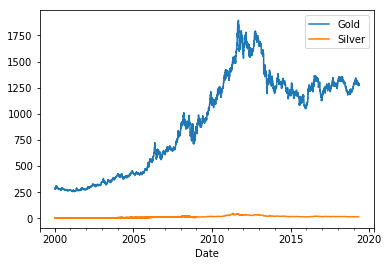

In [72]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

df_gold.plot(ax=ax1,label = 'Gold')
df_silver.plot(ax =ax1, label = 'Silver')
             
plt.legend()
plt.show()

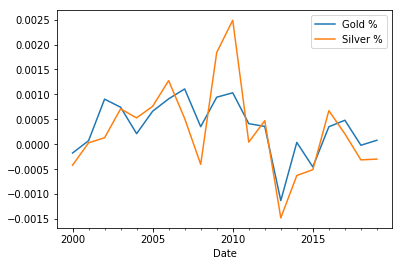

In [73]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

df_gold_perc.plot(ax=ax1,label = 'Gold %')
df_silver_perc.plot(ax =ax1, label = 'Silver %')
             
plt.legend()
plt.show()

# Merge Dataframes

In [74]:
df_goldandsilver = pd.merge(df_gold,df_silver, on='Date')
print(df_goldandsilver.head())

              Gold  Silver
Date                      
2000-01-03  290.25    5.45
2000-01-04  281.50    5.39
2000-01-05  280.45    5.35
2000-01-06  279.40    5.18
2000-01-07  282.10    5.17


# Rolling Statistics (mean and standard deviation)

In [75]:
df_goldandsilver_correlation = df_goldandsilver.corr()
print(df_goldandsilver_correlation)

            Gold    Silver
Gold    1.000000  0.919352
Silver  0.919352  1.000000


# Rolling Statistics (mean and standard deviation) Gold

In [76]:
df_goldandsilver['Gold12MA'] = df_goldandsilver['Gold'].rolling(window=12).mean()
df_goldandsilver['GoldSTD'] = df_goldandsilver['Silver'].rolling(window=12).std()
print(df_goldandsilver.head(12))

              Gold  Silver    Gold12MA   GoldSTD
Date                                            
2000-01-03  290.25    5.45         NaN       NaN
2000-01-04  281.50    5.39         NaN       NaN
2000-01-05  280.45    5.35         NaN       NaN
2000-01-06  279.40    5.18         NaN       NaN
2000-01-07  282.10    5.17         NaN       NaN
2000-01-10  281.60    5.18         NaN       NaN
2000-01-11  282.25    5.19         NaN       NaN
2000-01-12  282.25    5.19         NaN       NaN
2000-01-13  282.10    5.14         NaN       NaN
2000-01-14  283.30    5.15         NaN       NaN
2000-01-17  285.35    5.17         NaN       NaN
2000-01-18  285.80    5.17  283.029167  0.105238


# Rolling Statistics (mean and standard deviation) Silver

In [77]:
df_goldandsilver['Silver12MA'] = df_goldandsilver['Silver'].rolling(window=12).mean()
df_goldandsilver['SilverSTD'] = df_goldandsilver['Silver'].rolling(window=12).std()
print(df_goldandsilver.head(12))

              Gold  Silver    Gold12MA   GoldSTD  Silver12MA  SilverSTD
Date                                                                   
2000-01-03  290.25    5.45         NaN       NaN         NaN        NaN
2000-01-04  281.50    5.39         NaN       NaN         NaN        NaN
2000-01-05  280.45    5.35         NaN       NaN         NaN        NaN
2000-01-06  279.40    5.18         NaN       NaN         NaN        NaN
2000-01-07  282.10    5.17         NaN       NaN         NaN        NaN
2000-01-10  281.60    5.18         NaN       NaN         NaN        NaN
2000-01-11  282.25    5.19         NaN       NaN         NaN        NaN
2000-01-12  282.25    5.19         NaN       NaN         NaN        NaN
2000-01-13  282.10    5.14         NaN       NaN         NaN        NaN
2000-01-14  283.30    5.15         NaN       NaN         NaN        NaN
2000-01-17  285.35    5.17         NaN       NaN         NaN        NaN
2000-01-18  285.80    5.17  283.029167  0.105238      5.2275   0

In [78]:
df_goldandsilver['Gold&SilverCorr'] = df_goldandsilver['Gold'].rolling(12).corr(df_goldandsilver['Silver'])
print(df_goldandsilver.head(12))

              Gold  Silver    Gold12MA   GoldSTD  Silver12MA  SilverSTD  \
Date                                                                      
2000-01-03  290.25    5.45         NaN       NaN         NaN        NaN   
2000-01-04  281.50    5.39         NaN       NaN         NaN        NaN   
2000-01-05  280.45    5.35         NaN       NaN         NaN        NaN   
2000-01-06  279.40    5.18         NaN       NaN         NaN        NaN   
2000-01-07  282.10    5.17         NaN       NaN         NaN        NaN   
2000-01-10  281.60    5.18         NaN       NaN         NaN        NaN   
2000-01-11  282.25    5.19         NaN       NaN         NaN        NaN   
2000-01-12  282.25    5.19         NaN       NaN         NaN        NaN   
2000-01-13  282.10    5.14         NaN       NaN         NaN        NaN   
2000-01-14  283.30    5.15         NaN       NaN         NaN        NaN   
2000-01-17  285.35    5.17         NaN       NaN         NaN        NaN   
2000-01-18  285.80    5.1

# Plot Everything

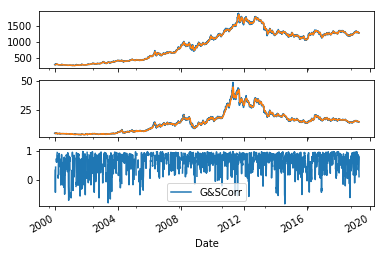

In [79]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,1), (0,0))
ax2 = plt.subplot2grid((3,1), (1,0), sharex=ax1)
ax3 = plt.subplot2grid((3,1), (2,0), sharex=ax1)

df_goldandsilver['Gold'].plot(ax=ax1,label = 'Gold')
df_goldandsilver['Gold12MA'].plot(ax =ax1, label = 'Gold12MA')

df_goldandsilver['Silver'].plot(ax=ax2,label = 'Silver')
df_goldandsilver['Silver12MA'].plot(ax =ax2, label = 'Silver12MA')

df_goldandsilver['Gold&SilverCorr'].plot(ax=ax3,label = 'G&SCorr')
             
plt.legend()
plt.show()
